<a href="https://colab.research.google.com/github/MaitreyeeBudhale/Data-Analysis/blob/main/Jobs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


## **0.Load Data**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

# **1.Explore data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


## 1.1 Find Null values

In [5]:
df.isnull().sum() #finds total null values in eachcolumn

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


## 1.2 Find duplicate values

In [6]:
df.duplicated(subset='job_id').sum()

np.int64(6137)

## 1.3 Remove unwanted column

In [7]:
del df['posted_on']
del df['job_link']
del df['company_link']

In [8]:
df.columns

Index(['job_id', 'job_role', 'company', 'experience', 'salary', 'location',
       'rating', 'reviews', 'resposibilities'],
      dtype='object')

In [9]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management"
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana..."
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage..."
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage..."
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object..."
...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,..."
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil..."
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax"
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service..."


# **2.Data Cleaning**

## 2.1 Deal with null values
*   remove coumns with null values except rating and reviews
*   deal with review and rating seperately




In [10]:
df=df.dropna(subset=['job_id','company','resposibilities'])
df['experience']=df['experience'].fillna('5-10 years')
df['location']=df['location'].fillna('Bangalore/Bangaluru')
df['rating']=df['rating'].fillna('0.0')
df['reviews']=df['reviews'].fillna('0 reviews')

<ipython-input-10-89c68582c64c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience']=df['experience'].fillna('5-10 years')
<ipython-input-10-89c68582c64c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location']=df['location'].fillna('Bangalore/Bangaluru')
<ipython-input-10-89c68582c64c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [11]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,0
reviews,0
resposibilities,0


## 2.2 Deal with duplicate

In [12]:
df=df.drop_duplicates(subset='job_id')

In [13]:
df.duplicated(subset='job_id').sum()

np.int64(0)

## 2.3 Change data type of Job Id


In [15]:
df['job_id']=df['job_id'].astype('int').astype('str')

## 2.4 Clean experiance

In [16]:
df['min_experience']=df['experience'].str.replace('Yrs','').str.replace('years','').str.split('-').str[0].str.strip().astype('int')
df['max_experience']=df['experience'].str.replace('Yrs','').str.replace('years','').str.split('-').str[1].str.strip().astype('int')

## 2.5 Clean Salary

In [17]:
def extract_min_salary(s):
    try:
        clean = s.replace(' PA.', '').split('(')[0].split('-')[0].strip().replace(',', '')
        return int(clean)
    except:
        return 'Not Disclosed'

df['min_salary'] = df['salary'].apply(extract_min_salary)

In [18]:
df['min_salary'].unique()

array(['Not Disclosed', 700000, 1000000, 400000, 250000, 2500000, 1300000,
       850000, 425000, 550000, 800000, 50000, 475000, 600000, 500000,
       1800000, 200000, 2000000, 300000, 1500000, 900000, 2250000, 950000,
       1200000, 100000, 350000, 175000, 225000, 650000, 325000, 375000,
       1400000, 150000, 60000, 3000000, 1700000, 450000, 750000, 4000000,
       125000, 3500000, 275000, 50000000, 1600000, 80000, 10000, 1100000,
       40000000, 90000, 2750000, 70000000, 1900000, 5500000, 35000000,
       15000, 70000, 20000000, 85000000, 10000000, 80000000, 6000000,
       15000000, 3750000, 65000000, 5000000, 60000000, 27500000, 30000000,
       4500000, 90000000, 3250000, 8000000, 9000000, 17500000, 42500000,
       7000000, 5000, 32500000, 7500000, 75000000, 22500000, 37500000],
      dtype=object)

In [19]:
def extract_min_salary(s):
    try:
        clean = s.replace(' PA.', '').split('(')[0].split('-')[1].strip().replace(',', '')
        return int(clean)
    except:
        return 'Not Disclosed'

df['max_salary'] = df['salary'].apply(extract_min_salary)


In [20]:
df['max_salary'].unique()

array(['Not Disclosed', 1700000, 2000000, 900000, 350000, 2750000,
       2250000, 1850000, 450000, 1550000, 1400000, 1800000, 300000,
       800000, 1200000, 1500000, 1600000, 700000, 3000000, 650000, 600000,
       1900000, 2500000, 3500000, 850000, 1300000, 90000, 475000, 750000,
       500000, 425000, 250000, 1650000, 400000, 70000, 1000000, 325000,
       200000, 4000000, 550000, 150000, 275000, 2400000, 1100000, 375000,
       4500000, 675000, 2200000, 225000, 2300000, 5000000, 975000,
       3250000, 6500000, 175000, 3300000, 950000, 3100000, 825000, 80000,
       15000, 100000, 60000000, 125000, 4250000, 725000, 60000, 2100000,
       50000000, 90000000, 9000000, 1750000, 37500000, 25000, 3200000,
       7000000, 1950000, 6000000, 625000, 30000000, 925000, 3750000,
       8000000, 775000, 10000000, 85000000, 8500000, 75000000, 875000,
       40000000, 45000000, 80000000, 9500000, 5500000, 70000000, 7500000,
       17500000, 12500000, 4750000, 20000000, 5000, 10000, 15000000,
  

## 2.6 Clean city column

In [21]:
df['clean_location']=df['location'].str.replace('(All Areas)','').str.replace(',','').str.replace('/',' ').str.strip().str.split(' ')

## 2.7 Convert reviews and rating column

In [22]:
df['reviews']=df['reviews'].str.replace(r'[Rr]eviews','',regex=True).str.strip().astype(int)

In [23]:
df['rating']=df['rating'].astype(float)

#**3. Data Analysis**

## 3.1 Overall Analysis

In [25]:
print('-'*40)
print("Total Number of Unique Jobs:",df['job_id'].nunique())
print("Total number of companies:",df['company'].nunique())
print('-'*40)

----------------------------------------
Total Number of Unique Jobs: 72988
Total number of companies: 15313
----------------------------------------


## 3.2 Top 5 Companies (Reviews)

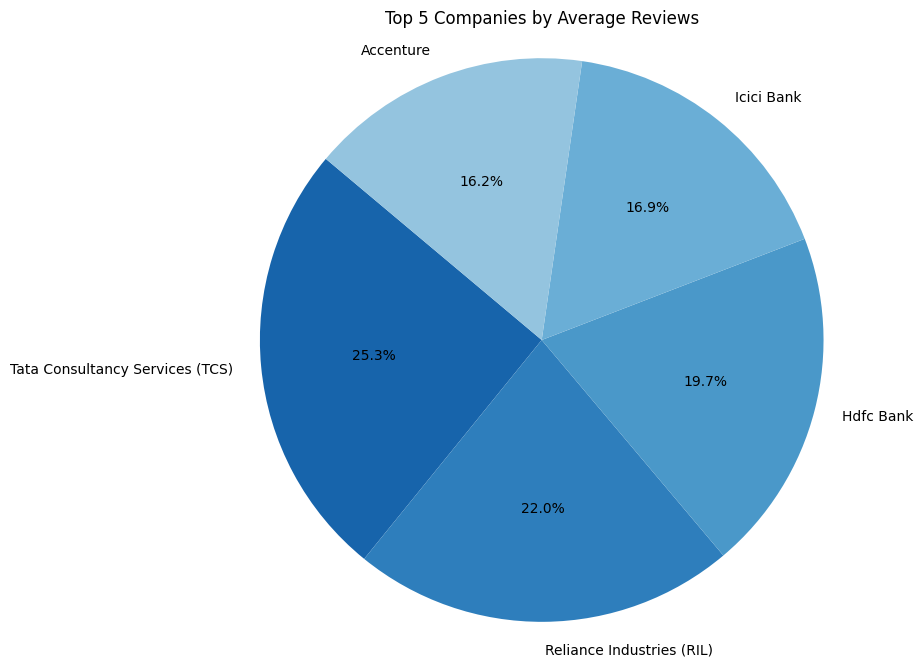

In [30]:
# Calculate mean reviews and select top 5
top_5_companies = df.groupby('company')['reviews'].mean().sort_values(ascending=False).head(5)

# Get a colormap for blue shades and reverse it
colors = cm.Blues(np.linspace(0.4, 0.8, len(top_5_companies)))[::-1] # Reverse the color order

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_companies, labels=top_5_companies.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Companies by Average Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 3.3 Companies hiring for Data Analyst

In [40]:
unique_companies = df[df['job_role'] == 'Data Analyst']['company'].unique()

company_table = pd.DataFrame(unique_companies, columns=['Company'])

company_table

,Company
0,Publicis Groupe
1,Omniactive Health Technologies
2,Quickxpert Infotech
3,GlobalLogic
4,Target
5,Hackerearth
6,Cointab Software
7,Control Risks India Pvt Ltd.
8,Axis My India Ltd.
9,Instinox Llp


## 3.4 Skills required to get job almost in all companies


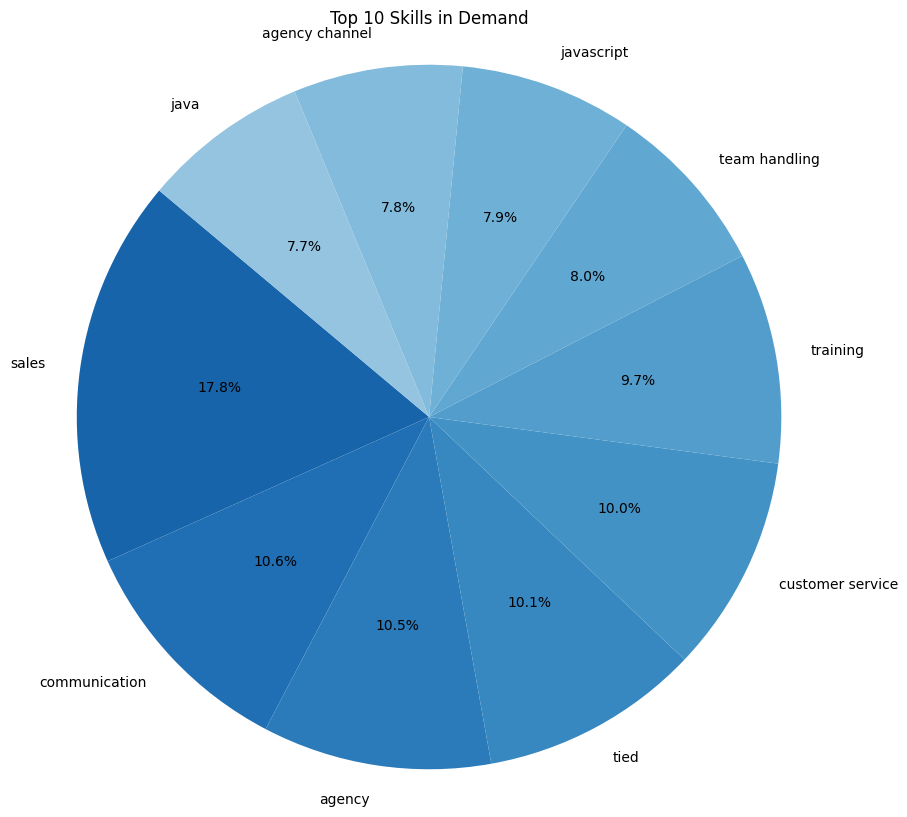

In [44]:
top_skills = df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

colors = cm.Blues(np.linspace(0.8, 0.4, len(top_skills)))

plt.figure(figsize=(10, 10))
plt.pie(top_skills, labels=top_skills.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Skills in Demand')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 3.4 Skills to get hired in HDFC

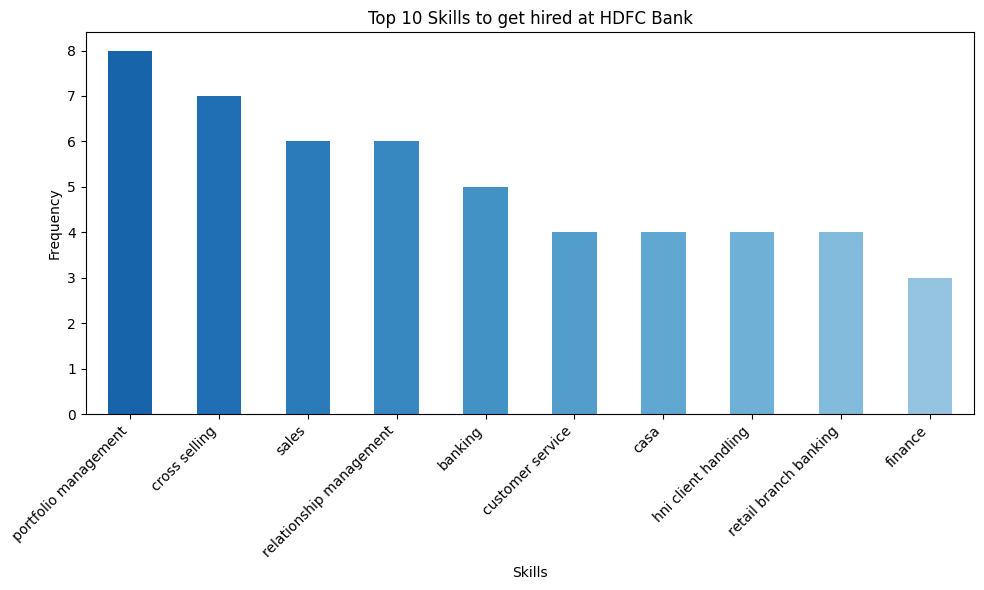

In [48]:
top_skills = df[df['company'] == 'Hdfc Bank']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

colors = cm.Blues(np.linspace(0.8, 0.4, len(top_skills)))

plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar',color=(colors))
plt.title('Top 10 Skills to get hired at HDFC Bank')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.5 Skills to get hired as Data Analyst

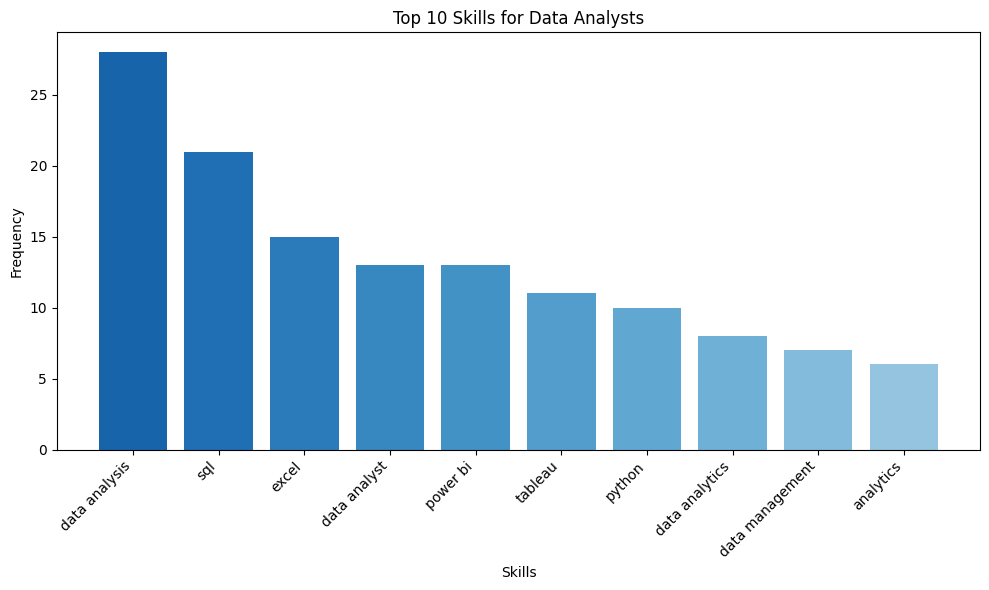

In [46]:
top_skills_da = df[df['job_role']=='Data Analyst']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

colors = cm.Blues(np.linspace(0.8, 0.4, len(top_skills)))

plt.figure(figsize=(10, 6))
plt.bar(top_skills_da.index, top_skills_da.values, color=(colors)) # Using bar plot as it's more suitable
plt.title('Top 10 Skills for Data Analysts')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.6 Skills to get hired as Data Scientist

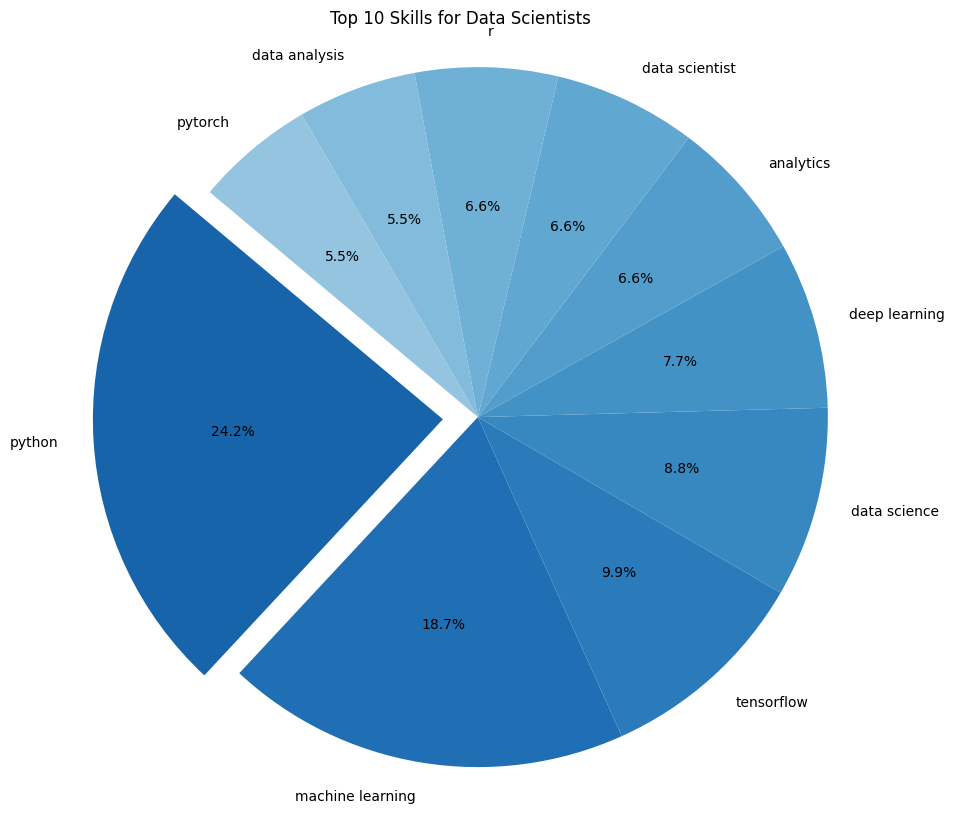

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm # Import colormap module

# Get the top 10 skills for Data Scientists
top_skills_ds = df[df['job_role']=='Data Scientist']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

# Create the explode effect (a list of zeros with one non-zero value)
explode = [0.1 if i == 0 else 0 for i in range(len(top_skills_ds))] # Explode the first slice

# Get a colormap for blue shades
colors = cm.Blues(np.linspace(0.8, 0.4, len(top_skills_ds))) # Use Blues colormap

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_skills_ds,
        labels=top_skills_ds.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors, # Use the blue shades colormap
        explode=explode) # Add the explode effect
plt.title('Top 10 Skills for Data Scientists')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()